In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime, timedelta
filepath = "/content/drive/MyDrive/Bellabeat" #storing filepath

In [ ]:
#Loading Datasets
# Loading Datasets with matching variable names
daily_activity = pd.read_csv(filepath + "/dailyActivity.csv")
heartrate_seconds = pd.read_csv(filepath + "/heartrate_seconds.csv")
hourly_calories = pd.read_csv(filepath + "/hourlyCalories.csv")
hourly_intensities = pd.read_csv(filepath + "/hourlyIntensities.csv")
hourly_steps = pd.read_csv(filepath + "/hourlySteps.csv")
minute_calories_narrow = pd.read_csv(filepath + "/minuteCaloriesNarrow.csv")
minute_intensities_narrow = pd.read_csv(filepath + "/minuteIntensitiesNarrow.csv")
minute_METs_narrow = pd.read_csv(filepath + "/minuteMETsNarrow.csv")
minute_sleep = pd.read_csv(filepath + "/minuteSleep.csv")
minute_steps_narrow = pd.read_csv(filepath + "/minuteStepsNarrow.csv")
weight_log_info = pd.read_csv(filepath + "/weightLogInfo.csv")

In [ ]:
#checking the datasets
print("daily_activity")
daily_activity.info()
print("\n heartrate_seconds")
heartrate_seconds.info()
print("\n hourly_calories")
hourly_calories.info()
print("\n hourly_intensities")
hourly_intensities.info()
print("\n hourly_steps")
hourly_steps.info()
print("\n minute_calories_narrow")
minute_calories_narrow.info()
print("\n minute_intensities_narrow")
minute_intensities_narrow.info()
print("\n minute_METs_narrow")
minute_METs_narrow.info()
print("\n minute_sleep")
minute_sleep.info()
print("\n minute_steps_narrow")
minute_steps_narrow.info()
print("\n weight_log_info")
weight_log_info.info()



daily_activity
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        457 non-null    int64  
 1   ActivityDate              457 non-null    object 
 2   TotalSteps                457 non-null    int64  
 3   TotalDistance             457 non-null    float64
 4   TrackerDistance           457 non-null    float64
 5   LoggedActivitiesDistance  457 non-null    float64
 6   VeryActiveDistance        457 non-null    float64
 7   ModeratelyActiveDistance  457 non-null    float64
 8   LightActiveDistance       457 non-null    float64
 9   SedentaryActiveDistance   457 non-null    float64
 10  VeryActiveMinutes         457 non-null    int64  
 11  FairlyActiveMinutes       457 non-null    int64  
 12  LightlyActiveMinutes      457 non-null    int64  
 13  SedentaryMinutes          457 non-null    int64  


In [ ]:
# Remove duplicates from each dataset
daily_activity = daily_activity.drop_duplicates()
heartrate_seconds = heartrate_seconds.drop_duplicates()
hourly_calories = hourly_calories.drop_duplicates()
hourly_intensities = hourly_intensities.drop_duplicates()
hourly_steps = hourly_steps.drop_duplicates()
minute_calories_narrow = minute_calories_narrow.drop_duplicates()
minute_intensities_narrow = minute_intensities_narrow.drop_duplicates()
minute_METs_narrow = minute_METs_narrow.drop_duplicates()
minute_sleep = minute_sleep.drop_duplicates()
minute_steps_narrow = minute_steps_narrow.drop_duplicates()
weight_log_info = weight_log_info.drop_duplicates()

In [ ]:
datetime_format = '%m/%d/%Y %I:%M:%S %p'

# Convert columns with only date
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate'], format='%m/%d/%Y')
weight_log_info['Date'] = pd.to_datetime(weight_log_info['Date'], format=datetime_format)

# Convert timestamp columns (with time included)
heartrate_seconds['Time'] = pd.to_datetime(heartrate_seconds['Time'], format=datetime_format)
hourly_calories['ActivityHour'] = pd.to_datetime(hourly_calories['ActivityHour'], format=datetime_format)
hourly_intensities['ActivityHour'] = pd.to_datetime(hourly_intensities['ActivityHour'], format=datetime_format)
hourly_steps['ActivityHour'] = pd.to_datetime(hourly_steps['ActivityHour'], format=datetime_format)
minute_calories_narrow['ActivityMinute'] = pd.to_datetime(minute_calories_narrow['ActivityMinute'], format=datetime_format)
minute_intensities_narrow['ActivityMinute'] = pd.to_datetime(minute_intensities_narrow['ActivityMinute'], format=datetime_format)
minute_METs_narrow['ActivityMinute'] = pd.to_datetime(minute_METs_narrow['ActivityMinute'], format=datetime_format)
minute_steps_narrow['ActivityMinute'] = pd.to_datetime(minute_steps_narrow['ActivityMinute'], format=datetime_format)
minute_sleep['date'] = pd.to_datetime(minute_sleep['date'], format=datetime_format)

/tmp/ipython-input-50-3173304335.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minute_sleep['date'] = pd.to_datetime(minute_sleep['date'], format=datetime_format)


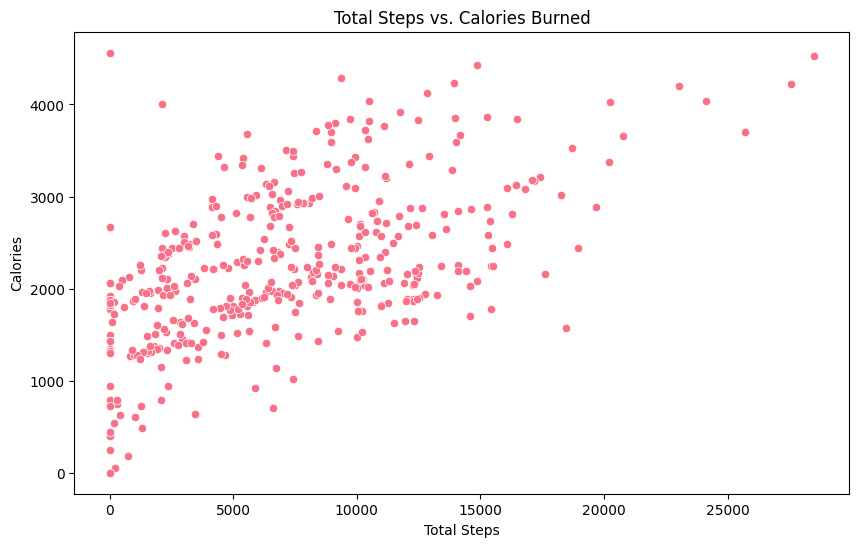

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=daily_activity, x='TotalSteps', y='Calories')
plt.title('Total Steps vs. Calories Burned')
plt.xlabel('Total Steps')
plt.ylabel('Calories')
plt.show()

/tmp/ipython-input-52-3509818032.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_active.index, y=avg_active.values, palette='viridis')


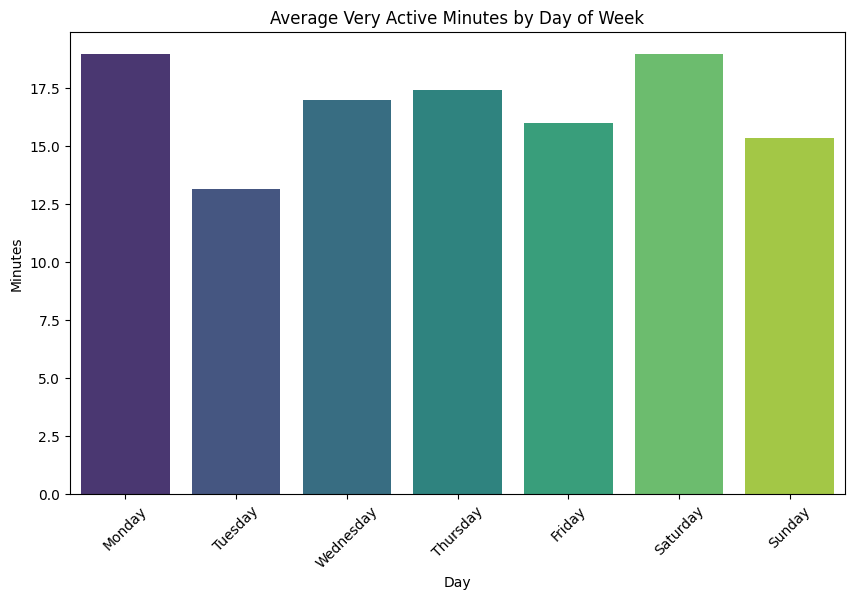

In [ ]:
daily_activity['day_of_week'] = daily_activity['ActivityDate'].dt.day_name()
avg_active = daily_activity.groupby('day_of_week')['VeryActiveMinutes'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_active.index, y=avg_active.values, palette='viridis')
plt.title('Average Very Active Minutes by Day of Week')
plt.ylabel('Minutes')
plt.xlabel('Day')
plt.xticks(rotation=45)
plt.show()

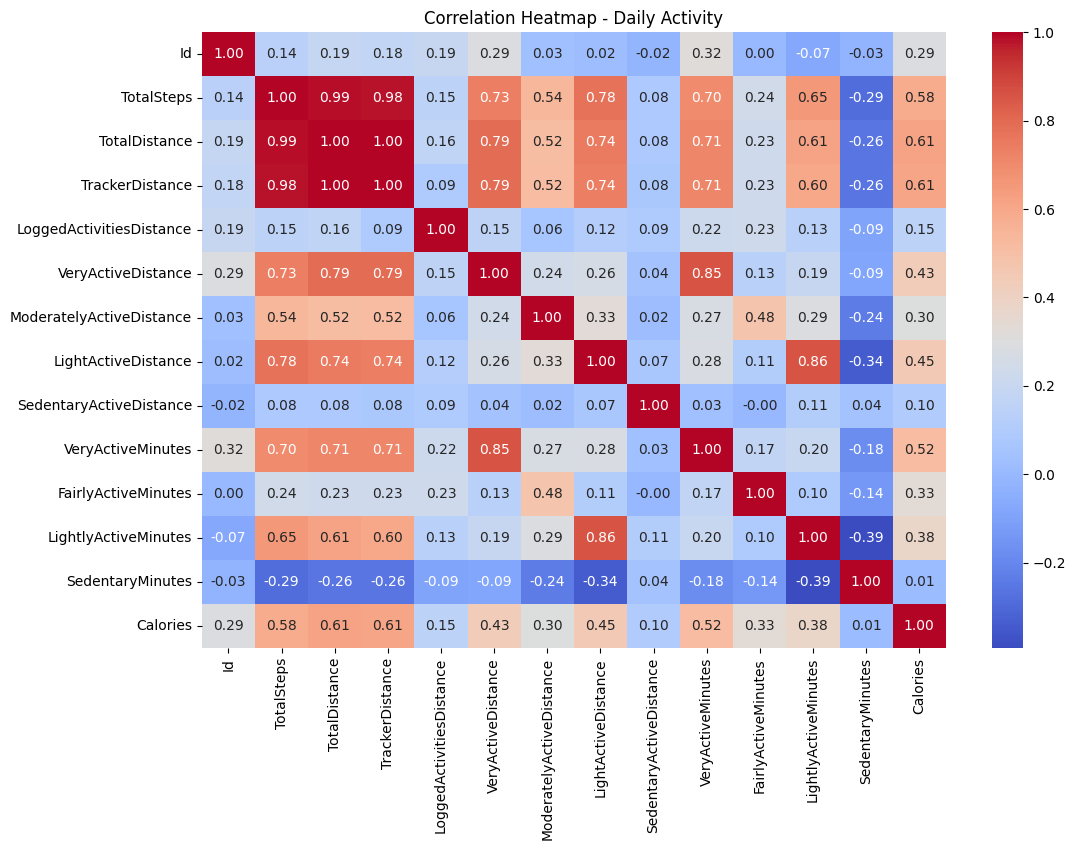

In [ ]:
# Compute correlation matrix
corr_matrix = daily_activity.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap - Daily Activity')
plt.show()

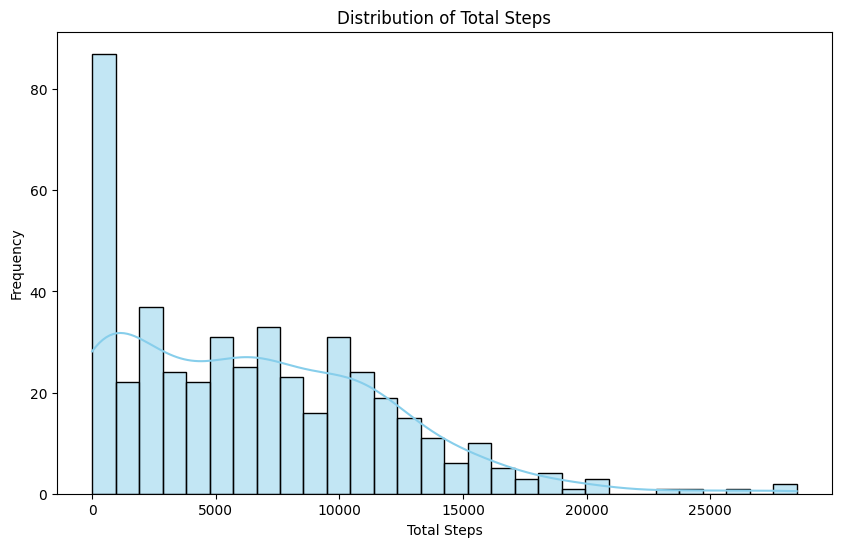

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(daily_activity['TotalSteps'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Total Steps')
plt.xlabel('Total Steps')
plt.ylabel('Frequency')
plt.show()

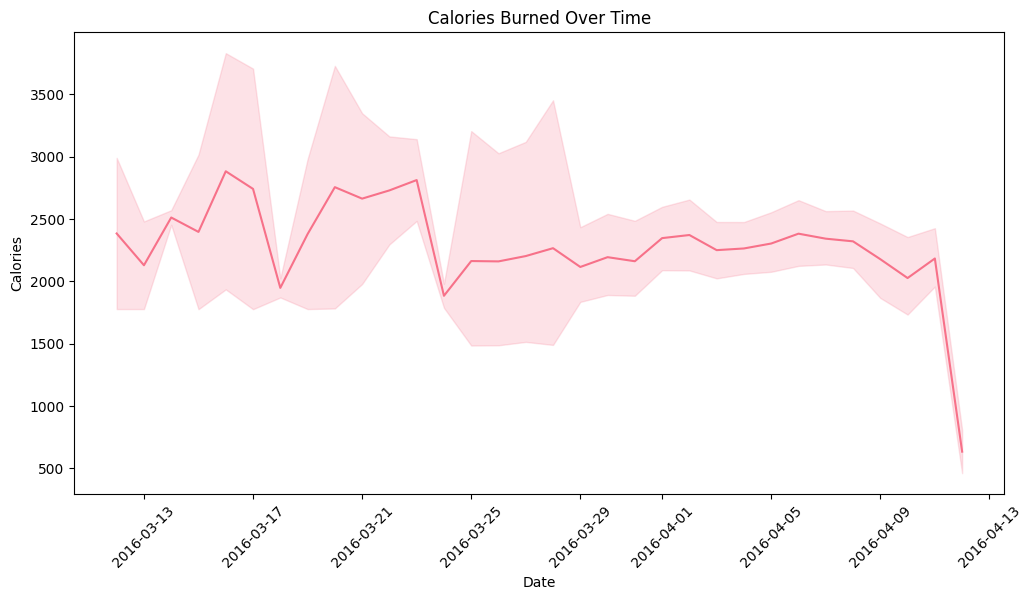

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=daily_activity, x='ActivityDate', y='Calories')
plt.title('Calories Burned Over Time')
plt.xlabel('Date')
plt.ylabel('Calories')
plt.xticks(rotation=45)
plt.show()


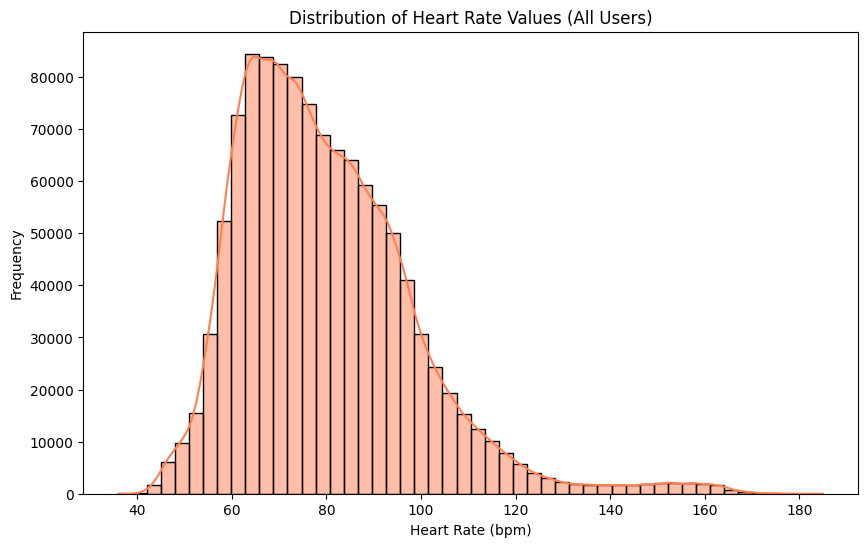

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(heartrate_seconds['Value'], bins=50, kde=True, color='coral')
plt.title('Distribution of Heart Rate Values (All Users)')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.show()

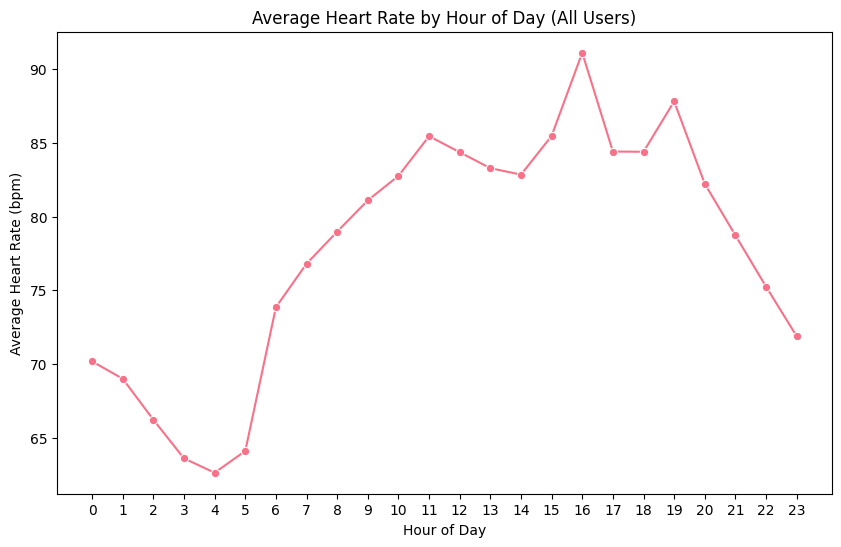

In [ ]:
heartrate_seconds['Hour'] = pd.to_datetime(heartrate_seconds['Time']).dt.hour
hr_by_hour = heartrate_seconds.groupby('Hour')['Value'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=hr_by_hour, x='Hour', y='Value', marker='o')
plt.title('Average Heart Rate by Hour of Day (All Users)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Heart Rate (bpm)')
plt.xticks(range(0,24))
plt.show()

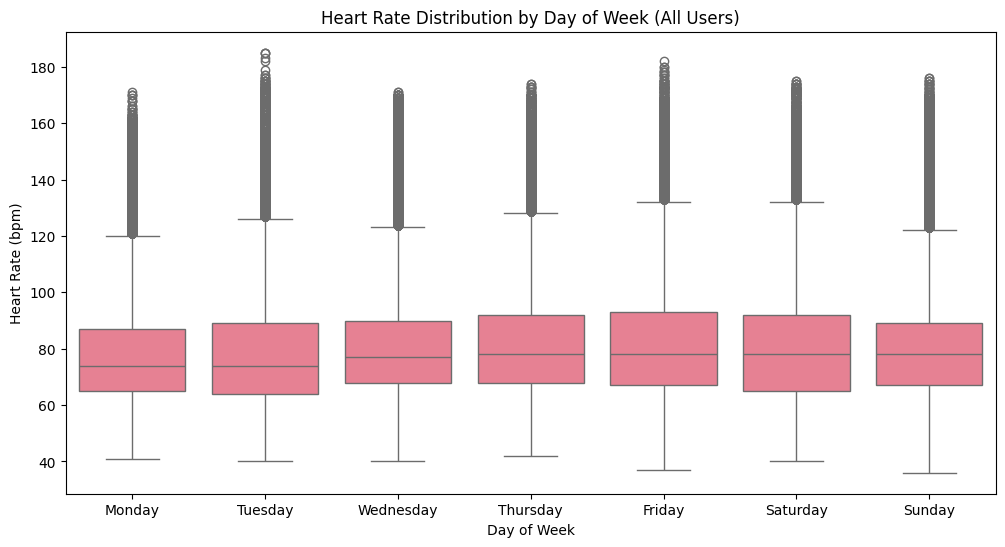

In [ ]:
heartrate_seconds['DayOfWeek'] = pd.to_datetime(heartrate_seconds['Time']).dt.day_name()

plt.figure(figsize=(12,6))
sns.boxplot(data=heartrate_seconds, x='DayOfWeek', y='Value', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Heart Rate Distribution by Day of Week (All Users)')
plt.xlabel('Day of Week')
plt.ylabel('Heart Rate (bpm)')
plt.show()

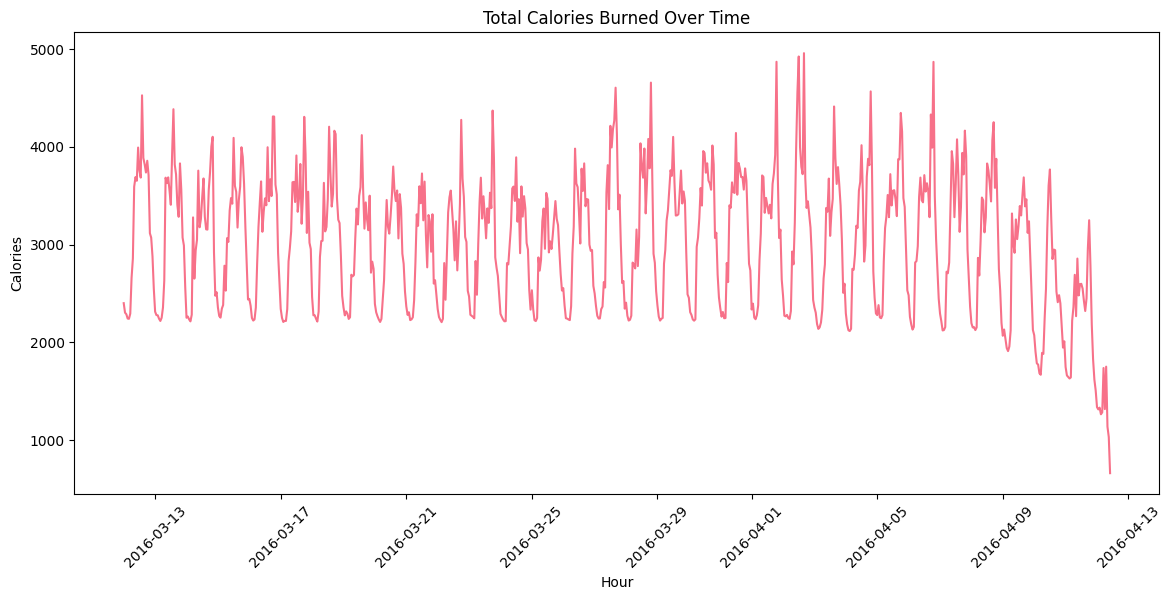

In [ ]:
hourly_calories['ActivityHour'] = pd.to_datetime(hourly_calories['ActivityHour'])
calories_by_hour = hourly_calories.groupby('ActivityHour')['Calories'].sum().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(data=calories_by_hour, x='ActivityHour', y='Calories')
plt.title('Total Calories Burned Over Time')
plt.xlabel('Hour')
plt.ylabel('Calories')
plt.xticks(rotation=45)
plt.show()


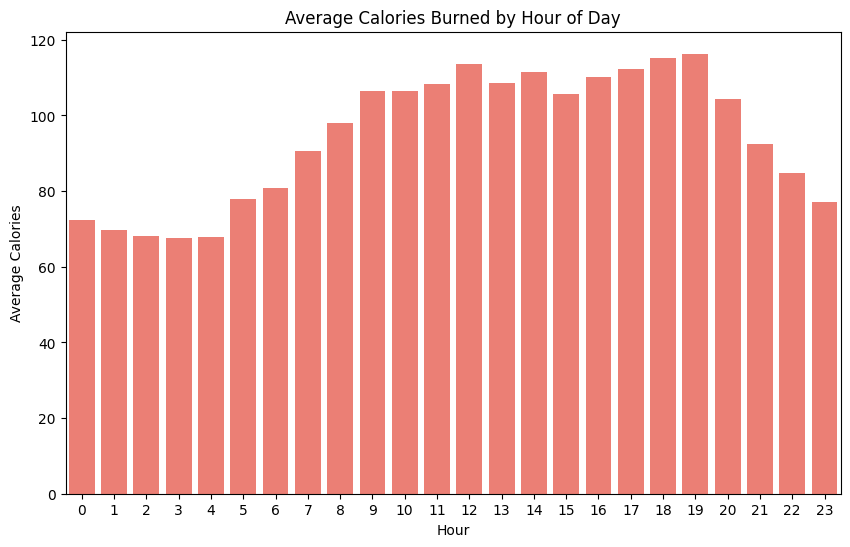

In [ ]:
hourly_calories['Hour'] = hourly_calories['ActivityHour'].dt.hour
avg_calories_hour = hourly_calories.groupby('Hour')['Calories'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=avg_calories_hour, x='Hour', y='Calories', color='#FF6F61')
plt.title('Average Calories Burned by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average Calories')
plt.show()


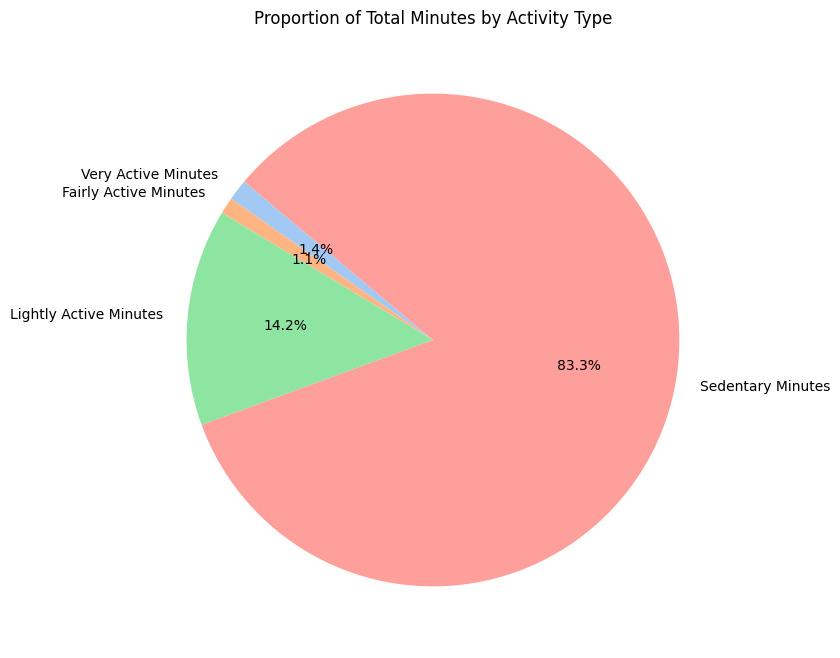

In [ ]:
# Sum total minutes per activity type across all days and users
activity_minutes_totals = {
    'Very Active Minutes': daily_activity['VeryActiveMinutes'].sum(),
    'Fairly Active Minutes': daily_activity['FairlyActiveMinutes'].sum(),
    'Lightly Active Minutes': daily_activity['LightlyActiveMinutes'].sum(),
    'Sedentary Minutes': daily_activity['SedentaryMinutes'].sum()
}

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(activity_minutes_totals.values(), labels=activity_minutes_totals.keys(),
        autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proportion of Total Minutes by Activity Type')
plt.show()

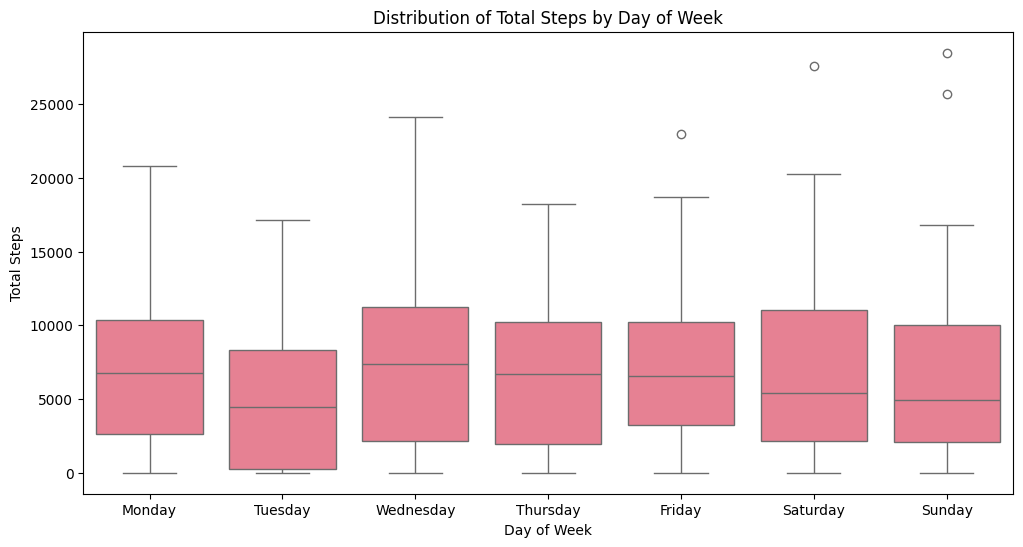

In [ ]:
daily_activity['DayOfWeek'] = daily_activity['ActivityDate'].dt.day_name()

plt.figure(figsize=(12,6))
sns.boxplot(data=daily_activity, x='DayOfWeek', y='TotalSteps',
            order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Distribution of Total Steps by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Steps')
plt.show()


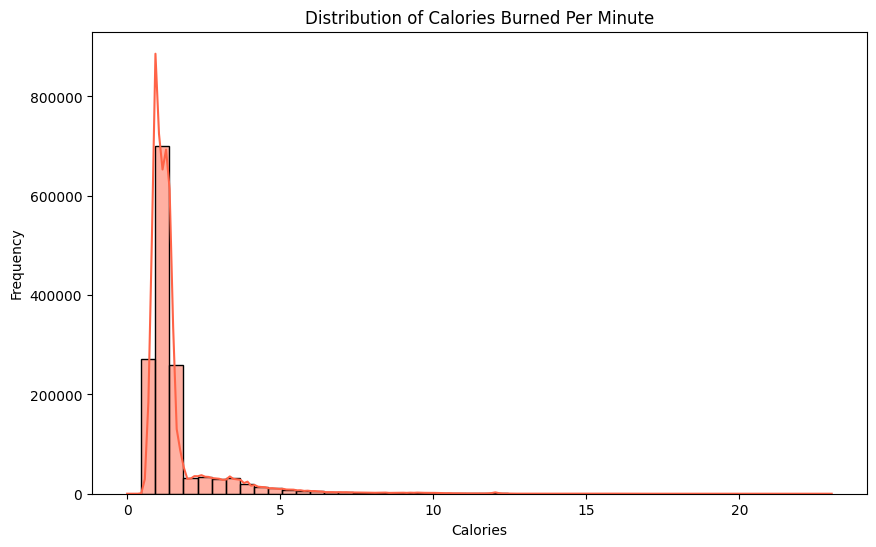

In [ ]:
# Histogram
plt.figure(figsize=(10,6))
sns.histplot(minute_calories_narrow['Calories'], bins=50, kde=True, color='tomato')
plt.title('Distribution of Calories Burned Per Minute')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

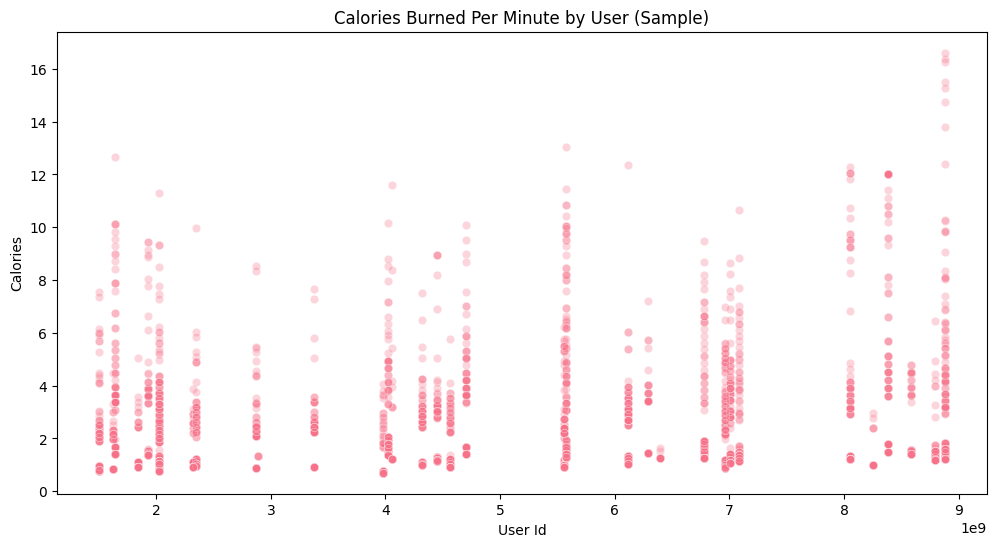

In [ ]:
# Scatter plot Calories vs User Id (sample to avoid overload)
sample = minute_calories_narrow.sample(10000)
plt.figure(figsize=(12,6))
sns.scatterplot(data=sample, x='Id', y='Calories', alpha=0.3)
plt.title('Calories Burned Per Minute by User (Sample)')
plt.xlabel('User Id')
plt.ylabel('Calories')
plt.show()

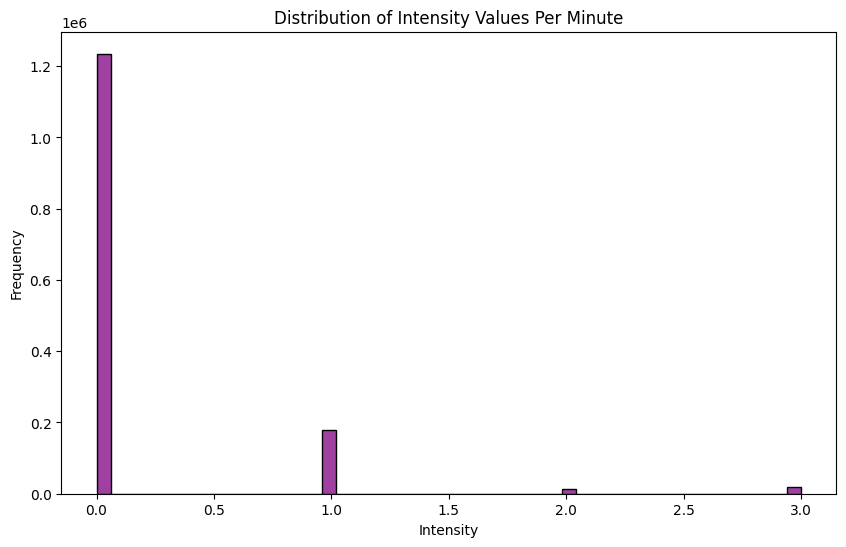

In [ ]:
# Histogram
plt.figure(figsize=(10,6))
sns.histplot(minute_intensities_narrow['Intensity'], bins=50, color='purple')
plt.title('Distribution of Intensity Values Per Minute')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.show()

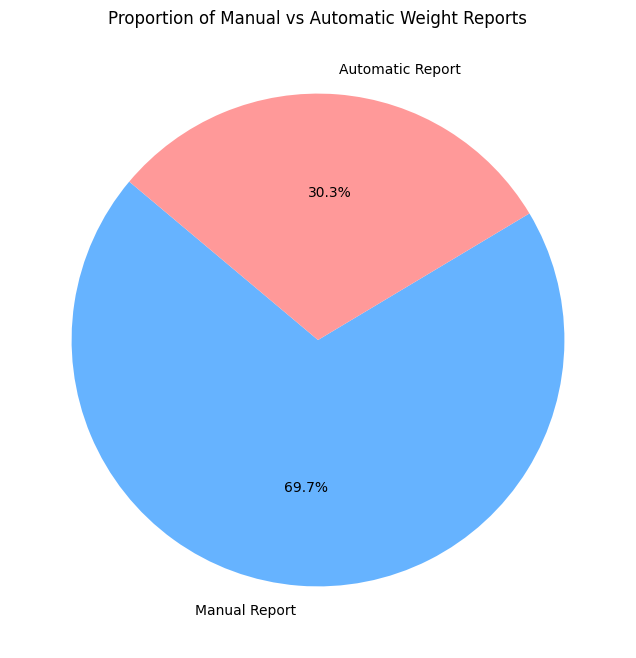

In [ ]:
# Count manual vs automatic reports
report_counts = weight_log_info['IsManualReport'].value_counts()

# Map True/False to labels
report_counts.index = report_counts.index.map({True: 'Manual Report', False: 'Automatic Report'})

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(report_counts, labels=report_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Proportion of Manual vs Automatic Weight Reports')
plt.show()
